In [490]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040569.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2        3        4         5         6  \
0  1.487781  1.467253  1.445748  1.42522  1.40958  1.392962  1.372434   

          7         8         9  ...     4192      4193      4194      4195  \
0  1.353861  1.337243  1.322581  ...  1.02346  1.022483  1.022483  1.020528   

      4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  1.01955  1.018573  1.017595  1.016618    144.581679      63.950979  

[1 rows x 4202 columns]
[144.58167876]  /  [63.95097905]
          0         1         2        3        4         5         6  \
0  1.487781  1.467253  1.445748  1.42522  1.40958  1.392962  1.372434   

          7         8         9  ...      4190     4191     4192      4193  \
0  1.353861  1.337243  1.322581  ...  1.033236  1.02737  1.02346  1.022483   

       4194      4195     4196      4197      4198      4199  
0  1.022483  1.020528  1.01955  1.018573  1.017595  1.016618  

[1 rows x 4200 columns]


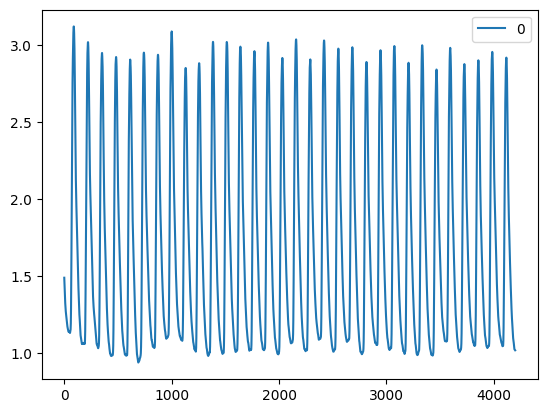

In [491]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [492]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

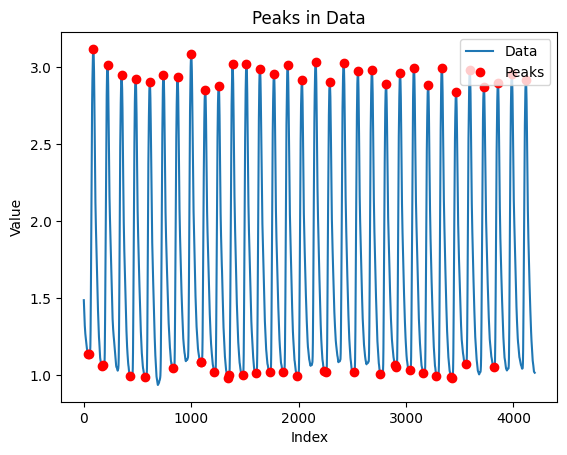

{'indices': array([  42,   47,   88,  167,  180,  221,  352,  429,  483,  569,  614,
        741,  829,  873, 1000, 1090, 1094, 1130, 1215, 1256, 1339, 1353,
       1385, 1479, 1513, 1602, 1640, 1738, 1771, 1851, 1898, 1988, 2031,
       2159, 2237, 2255, 2291, 2419, 2516, 2552, 2683, 2760, 2814, 2900,
       2910, 2945, 3037, 3074, 3160, 3206, 3284, 3333, 3421, 3430, 3466,
       3558, 3594, 3726, 3821, 3856, 3986, 4116]), 'values': array([1.13880743, 1.13880743, 3.11925709, 1.06158358, 1.06451613,
       3.01759531, 2.94721408, 0.99706745, 2.92082111, 0.98924731,
       2.90420332, 2.94916911, 1.0459433 , 2.93548387, 3.08699902,
       1.08602151, 1.08406647, 2.84946237, 1.02443793, 2.88074291,
       0.98435973, 1.00488759, 3.01955034, 1.00097752, 3.01857283,
       1.01368524, 2.98826979, 1.02248289, 2.95894428, 1.02443793,
       3.01466276, 0.99706745, 2.91495601, 3.03519062, 1.02639296,
       1.02248289, 2.90518084, 3.028348  , 1.02150538, 2.97556207,
       2.98435973, 1.00782

In [494]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [497]:
def split_values_high_low(filtered_df, threshold=2):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[None, None, 3.1192570869990224, None, None, 3.0175953079178885, 2.9472140762463344, None, 2.920821114369501, None, 2.9042033235581624, 2.949169110459433, None, 2.935483870967742, 3.0869990224828934, None, None, 2.849462365591398, None, 2.8807429130009776, None, None, 3.0195503421309877, None, 3.018572825024438, None, 2.988269794721408, None, 2.9589442815249267, None, 3.0146627565982405, None, 2.9149560117302054, 3.035190615835777, None, None, 2.905180840664712, 3.0283479960899315, None, 2.975562072336266, 2.98435972629521, None, 2.8885630498533725, None, None, 2.964809384164223, None, 2.992179863147605, None, 2.8836754643206257, None, 2.997067448680352, None, None, 2.8396871945259043, None, 2.9804496578690127, 2.874877810361681, None, 2.8993157380254155, 2.95405669599218, 2.916911045943304]
[1.13880742913001, 1.13880742913001, None, 1.06158357771261, 1.064516129032258, None, None, 0.997067448680352, None, 0.989247311827957, None, None, 1.04594330400782, None, None, 1.086021505376344, 

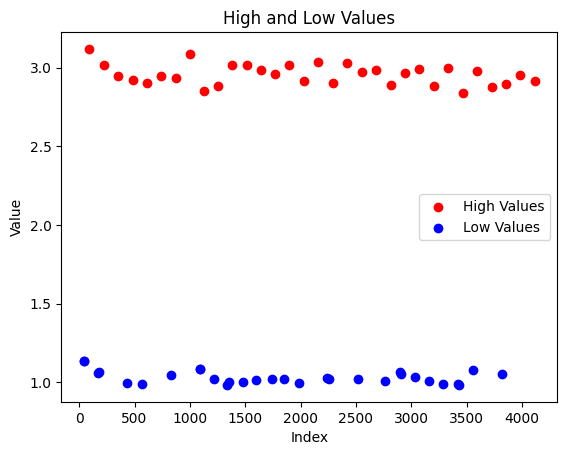

In [498]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [499]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 2.95769183773216
Average Low Value: 1.0338546757901599


In [510]:
# Scale down to 0-1
def scale_down(a, min_val_orig=0, max_val_orig=3.2, min_val_scale=0, max_val_scale=1):

    scaled_value = min_val_scale + (a - min_val_orig) * (max_val_scale - min_val_scale) / (max_val_orig - min_val_orig)
    return scaled_value

In [511]:
scaled_average_high = scale_down(average_high)
scaled_average_low = scale_down(average_low)
print("Scaled value of", average_high, ":", scaled_average_high)
print("Scaled value of", average_low, ":", scaled_average_low)

Scaled value of 2.95769183773216 : 0.9242786992913
Scaled value of 1.0338546757901599 : 0.32307958618442495
